# **CAPSTONE PROJECT: SALES DATA ANALYSIS**

## **Business Understanding**
* The data collected is transactional data for electronic items sales for the period between 2000 and 2030.
* The goal of this project is to analyse the sales data for the period year 2019 and generate a report with factors to be considered to improve sales performance.


### **Questions**

1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered? 

7. You are required to show additional details from your findings in your data.

*NB: Products with unit prices above $99.99 should be labelled high-level products  otherwise they should be basic level.*

### **Importing Libraries and Data Loading**

In [171]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import dotenv_values
import pyodbc
from datetime import datetime
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [172]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Connection string
connection_string = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [173]:
# Establish a connection
conn = pyodbc.connect(connection_string)

In [174]:
# Read data from the database
query = "SELECT * FROM dbo.Sales_July_2019"

July = pd.read_sql_query(query, conn)

In [175]:
query = "SELECT * FROM dbo.Sales_August_2019"

August = pd.read_sql_query(query, conn)
August.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00,"149 7th St, Portland, OR 97035"


In [176]:
query = "SELECT * FROM dbo.Sales_September_2019"

September = pd.read_sql_query(query, conn)
September.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151.0,AA Batteries (4-pack),4.0,3.84,2017-09-19 14:44:00,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.95,2029-09-19 10:19:00,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.95,2016-09-19 17:48:00,"151 Johnson St, Los Angeles, CA 90001"


In [177]:
query = "SELECT * FROM dbo.Sales_October_2019"

October = pd.read_sql_query(query, conn)
October.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,259358.0,34in Ultrawide Monitor,1.0,379.98999,2028-10-19 10:56:00,"609 Cherry St, Dallas, TX 75001"
1,259359.0,27in 4K Gaming Monitor,1.0,389.98999,2028-10-19 17:26:00,"225 5th St, Los Angeles, CA 90001"
2,259360.0,AAA Batteries (4-pack),2.0,2.99000,2024-10-19 17:20:00,"967 12th St, New York City, NY 10001"


In [178]:
query = "SELECT * FROM dbo.Sales_November_2019"

November = pd.read_sql_query(query, conn)
November.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.99,2021-11-19 09:54:00,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.95,2017-11-19 10:03:00,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001"


In [179]:
query = "SELECT * FROM dbo.Sales_December_2019"

December = pd.read_sql_query(query, conn)
December.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.00,2030-12-19 00:01:00,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.00,2029-12-19 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.95,2012-12-19 18:21:00,"277 Main St, New York City, NY 10001"


In [180]:
January = pd.read_csv("./Data/Sales_January_2019.csv")
January.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"


In [181]:
February = pd.read_csv("./Data/Sales_February_2019.csv")
February.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"


In [182]:
March = pd.read_csv("./Data/Sales_March_2019.csv")
March.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"


In [183]:
April = pd.read_csv("./Data/Sales_April_2019.csv")
April.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [184]:
May = pd.read_csv("./Data/Sales_May_2019.csv")
May.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"


In [185]:
June = pd.read_csv("./Data/Sales_June_2019.csv")
June.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"


#### **Observation**
> The datasets contain data monthly datasets with similar `variables` and therefore they can be `concatenated` vertically to one dataset.

In [186]:
#join the first half monthly datasets 
months =[January,February,March,April,May,June]
first_half = pd.concat(months)
first_half.sample(2)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
12192,221555,Wired Headphones,1,11.99,06/05/19 00:07,"264 Sunset St, San Francisco, CA 94016"
8078,184270,Lightning Charging Cable,1,14.95,04/14/19 13:07,"851 Lincoln St, Seattle, WA 98101"


In [187]:
#join the second half monthly datasets
months2 =[July,August,September,October,November,December]
second_half = pd.concat(months2)
second_half.sample(2)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
10678,233128.0,AAA Batteries (4-pack),1.0,2.99,2023-07-19 21:41:00,"755 Center St, Seattle, WA 98101"
5268,283831.0,USB-C Charging Cable,1.0,11.95,2023-11-19 18:45:00,"568 Washington St, Los Angeles, CA 90001"


In [188]:
#renaming columns before concatenation

first_half = first_half.rename(columns={
    'Order ID': 'Order_ID',
    'Quantity Ordered': 'Quantity_Ordered',
    'Price Each': 'Price_Each',
    'Order Date': 'Order_Date',
    'Purchase Address': 'Purchase_Address'
})

first_half.head(1)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"


In [189]:
#concatenate the data
combined = [first_half, second_half]


df = pd.concat(combined, axis=0)

df.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"


# **Data Understanding**

In this section we are going to explore the shape, properities, composition and data issues of the the dataset and its variables.

In [190]:
# investigating the shape of our dataset
f"The dataset has {df.shape[0]:,} rows and {df.shape[1]} columns."

'The dataset has 186,850 rows and 6 columns.'

In [191]:
#investigating the variable data types and missing variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [192]:
#investigating missing values
df.isna().sum()

Order_ID            740
Product             545
Quantity_Ordered    740
Price_Each          740
Order_Date          740
Purchase_Address    545
dtype: int64

In [193]:
#total missing values
f"the total number of missing values in our dataset is:{df.isna().sum().sum():,}"

'the total number of missing values in our dataset is:4,050'

##### **Observation**
> - All the variables have `object` data types which is wrong.
> - `Products` and `Purchase_Address` had more entries and lesser `missing values` than the other variables that had an equal number of entries and missing values as well.

In [195]:
#checking for duplicates
f"Observation: {df.duplicated().sum():,} duplicated rows were found in the dataset"

'Observation: 1,161 duplicated rows were found in the dataset'

##### **Investigating Unique Entries For Each Variable and their Associated Data Types**

In [196]:
#checking for unique values in 'Quantity_Ordered' variable
df['Quantity_Ordered'].unique()

array(['1', '2', '3', '5', '4', nan, '7', 'Quantity Ordered', '6', '9',
       1.0, 5.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0], dtype=object)

##### **Observation**
> Some entires are misssing, `nan`, `Quantity Ordered` is a wrong entry and the `float`entries and `numeric entries in quotes` should be changed to `numeric entries` in the `Quantity_Ordered` variable

In [197]:
#checking for unique values in 'Order_ID' variable
df['Order_ID'].unique()

array(['141234', '141235', '141236', ..., 319668.0, 319669.0, 319670.0],
      dtype=object)

##### **Observation**
> The `float`entries and `numeric entries in quotes` should be changed to `numeric entries`

In [198]:
#checking for unique values in 'OPrice_Each' variable
df['Price_Each'].unique()


array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', nan, 'Price Each', '700.0', '150.0',
       '300.0', '1700.0', 150.0, 300.0, 3.8399999141693115,
       2.990000009536743, 99.98999786376953, 600.0, 11.949999809265137,
       14.949999809265137, 379.989990234375, 11.989999771118164, 400.0,
       149.99000549316406, 109.98999786376953, 999.989990234375,
       389.989990234375, 1700.0, 700.0], dtype=object)

##### **Observation**
> Some entires are misssing, `nan`, `Price Each` is a wrong entry and the `float`entries and `numeric entries in quotes` should be changed to `float`of equal length.

In [199]:
#checking for unique values in 'Order_Date' variable
df['Order_Date'].unique()

array(['01/22/19 21:25', '01/28/19 14:15', '01/17/19 13:33', ...,
       Timestamp('2001-12-19 12:01:00'), Timestamp('2009-12-19 06:43:00'),
       Timestamp('2003-12-19 10:39:00')], dtype=object)

##### **Observation**
> Date entries should be synchronized to one format for uniformity

In [200]:
#checking for unique values in 'Purchase_Address' variable
df['Purchase_Address'].unique()

array(['944 Walnut St, Boston, MA 02215',
       '185 Maple St, Portland, OR 97035',
       '538 Adams St, San Francisco, CA 94016', ...,
       '273 Wilson St, Seattle, WA 98101',
       '778 River St, Dallas, TX 75001',
       '747 Chestnut St, Los Angeles, CA 90001'], dtype=object)

##### **Observation**
> The `Purchase_Address` data can be split into, `Street`, `City` and `Address` columns

In [201]:
#checking for unique values in 'Product' variable
df['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product', None], dtype=object)

##### **Observation**
> - The `nan`and `None` entries indicate missing product name and they should be dealt with in the proceeding section for the `Product` variable.
>
> - Overall a number of `data issues` have been highlighted in this section which will be fixed in the next step

## **Data Preparation**

In this section we will deal with the data issues identified above; missing values, wrong data types, wrong entries, duplicated entries among others, to enusre we have clean data for analysis.

##### **Issue: Missing Values**

In [202]:
# We drop the all Null values from the dataset

df = df.dropna(how='any',axis=0)

df.isna().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [204]:
#investigating the shape after dropping `Nan`values
f"There are {df.shape[0]:,} rows and {df.shape[1]} columns in our dataset after dropping the null values"

'There are 186,110 rows and 6 columns in our dataset after dropping the null values'

##### **Issue: Duplicates**

In [205]:
# investigate the number of duplicated observations
f"There are {df.duplicated().sum()} duplicated observations after removing null values"

'There are 423 duplicated observations after removing null values'

In [206]:
# Overview of duplicated entries
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
19894,314675.0,AA Batteries (4-pack),1.0,3.84,2026-12-19 09:01:00,"927 13th St, San Francisco, CA 94016"
20452,315204.0,Wired Headphones,1.0,11.99,2012-12-19 12:41:00,"680 6th St, San Francisco, CA 94016"
21240,315955.0,ThinkPad Laptop,1.0,999.98999,2026-12-19 17:28:00,"588 Chestnut St, Seattle, WA 98101"
21467,316173.0,AAA Batteries (4-pack),1.0,2.99,2022-12-19 22:44:00,"907 Sunset St, Portland, OR 97035"


In [207]:
#remove the duplicates
df = df.drop_duplicates(subset=None, inplace=False)
f"There are {df.shape[0]:,} rows and {df.shape[1]} columns after removing duplicates"

'There are 185,687 rows and 6 columns after removing duplicates'

##### **Issiue: Variable Data Types**

In [208]:
#investigate variable data types
df.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [209]:
#dataset overview
df.head(2)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"


##### **Date Solution: Date Sychronizing**

In [210]:
# `Order_Date` data types
df['Order_Date'].unique()

array(['01/22/19 21:25', '01/28/19 14:15', '01/17/19 13:33', ...,
       Timestamp('2001-12-19 12:01:00'), Timestamp('2009-12-19 06:43:00'),
       Timestamp('2003-12-19 10:39:00')], dtype=object)

In [211]:
# To change the Order_date column to uniform
# create date function
def date(row):
    order_date = row['Order_Date']
    if isinstance(order_date, str) and order_date.startswith('Timestamp'):
        order_date = order_date.replace('Timestamp()','').strip()  # Assuming 'Timestamp()' is a placeholder
        try:
            return pd.to_datetime(order_date, format='%Y-%m-%d %H:%M:%S')
        except ValueError:
            return None  # Return None if the date string cannot be parsed
    else:
        try:
            return pd.to_datetime(order_date)
        except ValueError:
            return None


In [212]:
#apply date function
df['Order_Date'] = df.apply(date, axis=1)

In [213]:
#investigate unique `Order_Date` values after applying the date function
df['Order_Date'].unique()

<DatetimeArray>
['2019-01-22 21:25:00', '2019-01-28 14:15:00', '2019-01-17 13:33:00',
 '2019-01-05 20:33:00', '2019-01-25 11:59:00', '2019-01-29 20:22:00',
 '2019-01-26 12:16:00', '2019-01-05 12:04:00', '2019-01-01 10:30:00',
 '2019-01-22 21:20:00',
 ...
 '2003-12-19 05:50:00', '2023-12-19 14:08:00', '2013-12-19 07:25:00',
 '2011-12-19 21:24:00', '2007-12-19 08:25:00', '2030-12-19 01:06:00',
 '2011-12-19 20:58:00', '2001-12-19 12:01:00', '2009-12-19 06:43:00',
 '2003-12-19 10:39:00']
Length: 142396, dtype: datetime64[ns]

#### **Wrong Entry Soloution: Removing `Quantity Ordered` entries on `Quantity_Ordered`column**

In [214]:
#removing rows with `quantity ordered` entries on the `Quantity_Ordered` column
mask = df['Quantity_Ordered'] == 'Quantity Ordered'

# Apply the mask to filter rows where 'Quantity_Ordered' equals 'Quantity Ordered'
filtered_df = df[mask]

# Display the filtered DataFrame
filtered_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
1073,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address


In [215]:
#filter indeces to drop
indices_to_drop = filtered_df.index

# Drop the rows from df
df = df.drop(indices_to_drop)

# Reset the index of df after dropping rows
df = df.reset_index(drop=True)


In [216]:
#investigating null values after dropping null values and wrong entry observations
df.isna().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

#### **Wrong Variable Data Types Solution: Change to Appropriate Data Types**

In [217]:
#investigating the remaining variable datasets
df.dtypes

Order_ID                    object
Product                     object
Quantity_Ordered            object
Price_Each                  object
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object

In [218]:
#change variable data types to appropriate types
df = df.astype({
    'Order_ID': int,
    'Quantity_Ordered': int,
    'Price_Each': float,
    'Order_Date': 'datetime64[ns]'
})

df.dtypes

Order_ID                     int32
Product                     object
Quantity_Ordered             int32
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object

##### **Price Labels Solution: Assign `High-Level product` label to prices `>=` 99.99**

In [219]:
#define and apply price function to `Price_Each` to determine product level
def price(row):
    
    if row['Price_Each'] >= 99.99:
        return 'high-level product'
    else:
        return 'basic level product'
    


df['Product_level'] = df.apply(price, axis=1)

##### **Cities Variable Solution: Define and apply `Cities` function to `Purchase_Address`**

In [220]:
#define cities function and apply it to `Purchase_address` to come up with cities variable
def cities(row):
    purchase_address = row['Purchase_Address']
    if purchase_address.endswith(('94066', '94016','90001')):
        return 'San Francisco'
    elif purchase_address.endswith('02215'):
        return 'Boston'
    elif purchase_address.endswith('10001'):
        return 'New York'
    elif purchase_address.endswith('30301'):
        return 'Atlanta'
    elif purchase_address.endswith(('75001', '73301')):
        return 'Dallas'
    elif purchase_address.endswith('98101'):
        return 'Seattle'
    else:
        return 'Portland'

df['City'] = df.apply(cities, axis=1)   


df.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Product_level,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",high-level product,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",basic level product,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",basic level product,San Francisco


### *Issue Summary*
* All the columns dtypes are objects(string)
* The first half year and second half year columns names are different
* Our data has missing values in all columns
* Our data has duplicated values
* mixed `Order_Date`formats
* Additional `product level` and `Cities` columns needed

### *Issue Solutions*
* The second half year columns names have been changed to match the first half year column names
* The duplicated observations and wrong value entries have been dropped after careful consideration
* Rows with any missing values have been dropped. A total of 1163 rows have been dropped.
* The columns datatypes have been converted to their proper datatypes
* `product level` and `Cities` columns were created
* Sychronized date format.

## **Questions**
In this section, we answer the business questions that were posed to help derive insights that can help in increasing sales for the company.

In [150]:
#investigating the clean dataset
df.sample(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Product_level,City
5410,146403,AA Batteries (4-pack),1,3.84,2019-01-01 22:11:00,"180 Chestnut St, San Francisco, CA 94016",basic level product,San Francisco
132223,268281,AAA Batteries (4-pack),1,2.99,2003-10-19 19:31:00,"520 River St, Portland, ME 04101",basic level product,Portland
135764,271688,Google Phone,1,600.00,2005-10-19 19:26:00,"299 8th St, Portland, OR 97035",high-level product,Portland


### **1. How much money did we make this year?**
To answer this question we need to create a `total amount` column from `Quantity_Ordered` multiplied by `Price_Each` then aggregate the yearly sales and filter out the 2019 sales, our year of focus.

In [151]:
#aggregate total sales for each year and filter out 2019 sales
df['Total_amount($)'] = df['Quantity_Ordered'] * df['Price_Each']

yearly_sale = df.groupby(df.Order_Date.dt.year)['Total_amount($)'].sum()

df_2019 = df[(df['Order_Date'].dt.year == 2019)]


df_2019.head() 
#yearly_sale 

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Product_level,City,Total_amount($)
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",high-level product,Boston,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",basic level product,Portland,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",basic level product,San Francisco,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",high-level product,San Francisco,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",basic level product,Dallas,11.99


In [152]:
#save 2019 data to csv file for power BI visualization
df_2019.to_csv('data_2019.csv')

In [153]:
#investigate the properities of 2019 dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185675 entries, 0 to 185674
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185675 non-null  int32         
 1   Product           185675 non-null  object        
 2   Quantity_Ordered  185675 non-null  int32         
 3   Price_Each        185675 non-null  float64       
 4   Order_Date        185675 non-null  datetime64[ns]
 5   Purchase_Address  185675 non-null  object        
 6   Product_level     185675 non-null  object        
 7   City              185675 non-null  object        
 8   Total_amount($)   185675 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 11.3+ MB


In [156]:
#aggregate the Total-Amount sales to get the total sales for 2019
sales_2019 = df_2019['Total_amount($)'].sum()
f"Answer: This year(2019) we made ${sales_2019:,.2f} from product sales"

'Answer: This year(2019) we made $16,513,581.68 from product sales'

### **2. Can we identify any seasonality in the  sales?** 
To answer this question we will plot a monthly total sales graph to view the monthly sales variations throughout 2019 to establish whether there were any seasonal variations.

In [157]:
#define plot size
plt.figure(figsize=(8,6))

#calculate monthly sales for all the 12 months of 2019
sale_2019_filtered = df_2019.groupby(df_2019['Order_Date'].dt.month)['Total_amount($)'].count().reset_index()
sale_2019_filtered 

,Order_Date,Total_amount($)
0,1,9665
1,2,11956
2,3,15127
3,4,18256
4,5,16551
5,6,13534
6,7,467
7,8,411
8,9,404
9,10,675


<Figure size 800x600 with 0 Axes>

In [158]:
#Plot the monthly sales line graph for 2019
fig = px.line(sale_2019_filtered, x='Order_Date', y= 'Total_amount($)')
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title='Sales Over Time', title_x=0.5)

fig.show()

##### **Answer**
* There tends to be more sales in the first half of the year 2019, with the higest amount of sales being 3.4 million. The sales tend to drop in the 7th month of the year, with the lowest amount of sales being 1.1 million.

### **3. What are our best and worst-selling products?**
To answer this question we will aggregate the quantities of each product sold and arrange them in descending order. We can generate a bar chart to visualize the information.

In [159]:
products = df_2019.groupby('Product')['Quantity_Ordered'].sum().reset_index()

perfomance = products.sort_values(by='Quantity_Ordered',ascending=False).reset_index()

perfomance

,index,Product,Quantity_Ordered
0,5,AAA Batteries (4-pack),14697
1,4,AA Batteries (4-pack),13210
2,15,USB-C Charging Cable,11311
3,12,Lightning Charging Cable,11060
4,17,Wired Headphones,9817
5,6,Apple Airpods Headphones,7448
6,7,Bose SoundSport Headphones,6377
7,2,27in FHD Monitor,3640
8,18,iPhone,3331
9,3,34in Ultrawide Monitor,2998


In [160]:
#plot product performance bar chart
plt.figure(figsize=(8,6))

fig = px.bar(perfomance, x='Product', y='Quantity_Ordered')
fig.update_layout(title='Product Sales Perfomance', title_x=0.5)

fig.show()

<Figure size 800x600 with 0 Axes>

##### **Answer**
* From the figure above the Best selling products is `AAA Batteries(4-pack)` with a total order of 14,697, while the worst selling products is the `LG Dryer` with a total order of 331 sales.

### **4. How do sales compare to previous months or weeks?**
To answer this question we will aggregate monthly sales throughout the year for monthly comparision and do a weekly aggregate for weekly comparision, we will as well graph a pair plot for the weekly, monthly and total sales variables to see the bivariate distribution of those sales.

In [81]:
#aggregate the weekly, monthly and totol sales 
df_2019['Month'] = df_2019['Order_Date'].dt.month

df_2019['Week'] = df_2019['Order_Date'].dt.isocalendar().week

df_2019.head(3)

sales_monthly_weekly = df_2019.groupby(['Month','Week'])['Total_amount($)'].sum()

sales_monthly_weekly


Month  Week
1      1       344678.730000
       2       409389.430000
       3       394921.110000
       4       426020.170000
       5       237733.430000
2      5       221837.190000
       6       565300.050000
       7       568196.290000
       8       535207.510000
       9       309534.050000
3      9       268772.390000
       10      640496.380000
       11      595771.070000
       12      629060.550000
       13      670861.010000
4      14      774492.970000
       15      761454.220000
       16      805297.450000
       17      808682.730000
       18      239278.660000
5      18      525183.960000
       19      729309.990000
       20      695631.880000
       21      709784.550000
       22      490555.850000
6      22      177534.310000
       23      616368.480000
       24      594043.830000
       25      611459.510000
       26      576724.030000
7      27        3028.380000
       29       73736.119558
8      34       73121.099612
9      38       63822.469717
10

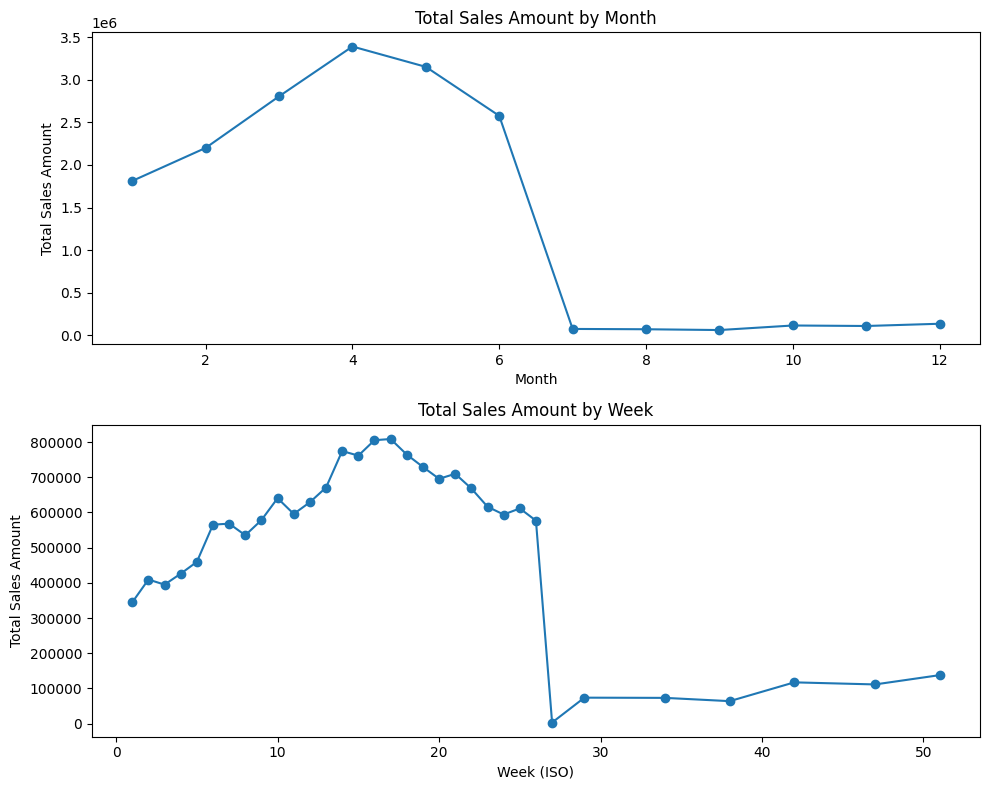

In [82]:
# Line plot for Monthly Sales

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Line plot for Monthly Sales
monthly_sales = df_2019.groupby('Month')['Total_amount($)'].sum()
ax1.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales Amount')
ax1.set_title('Total Sales Amount by Month')
ax1.tick_params(axis='x', rotation=0)
ax1.grid(False)

# Line plot for Weekly Sales
weekly_sales = df_2019.groupby('Week')['Total_amount($)'].sum()
ax2.plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-')
ax2.set_xlabel('Week (ISO)')
ax2.set_ylabel('Total Sales Amount')
ax2.set_title('Total Sales Amount by Week')  # Corrected here
ax2.tick_params(axis='x', rotation=0)
ax2.grid(False)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


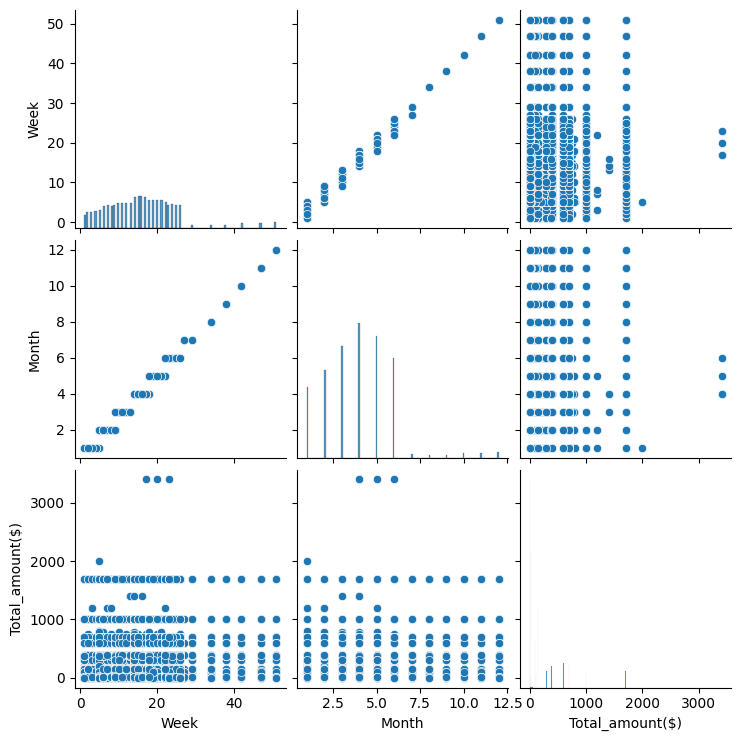

In [83]:
#pairplot distribution analysis
sns.pairplot(df_2019[['Week', 'Month', 'Total_amount($)']])
plt.grid(False)
plt.show()

##### **Answer**
* According to the analysis of the data throughout the year 2019, the sales are high in the first half months of the year but they drop in the second half.
* When data is analysed weekly, there are flactuations in sales such that sometimes an increase is observed but, then followed by a slight dip in sales. This trend goes on for the first half of the year till week 26 where the trend takes a deep drop in sales then maintains lower sells volumes with slight changes through the rest of the year.

### **5. Which cities are our products delivered to most?**
To answer this question we will aggregate the quantities ordered by the `City` variable and arrage them in descending order. We will plot a bar graph to illustrate that

In [162]:
#filter te 2019 dataset
df_2019 = df[df['Order_Date'].dt.year == 2019]

#aggregate sales by `City` and arrange them in descending order
city_delivery = df_2019.groupby('City')['Quantity_Ordered'].count()
city_delivery = city_delivery.sort_values(ascending=False)  # Sort the city_delivery Series
city_delivery

City
San Francisco    35454
New York         11805
Dallas           11757
Boston            9389
Atlanta           7167
Seattle           6883
Portland          6018
Name: Quantity_Ordered, dtype: int64

In [163]:
#city delivery sales volumes
plt.figure(figsize=(8,6))
color_palette = 'skybue'
# Pass index and values as x and y
fig = px.bar(city_delivery, x=city_delivery.index, y=city_delivery.values, color_continuous_scale='skyblue')  
fig.update_layout(title='City Delivery', yaxis_title='No. of Delivery',title_x=0.5)


fig.show()

<Figure size 800x600 with 0 Axes>

##### **Answer**
* The City of `San Francisco` has the highest number of deliveries with a total of 35,454 deliveries whereas the City with the lowest number of deliveries is `Portland` with a total of 6,018 deliveries done in year 2019.

###  **6. How do product categories compare in revenue generated and quantities  ordered?**
We will aggregate product revenues and sales voules and compare them side by side on a table and a graph to illustrate the differences.

In [164]:
#aggregate product revenues and sales volumes
product_category = df_2019.groupby('Product').agg({'Quantity_Ordered': 'sum', 'Total_amount($)': 'sum'}).reset_index()

product_category  = product_category.sort_values(by='Total_amount($)', ascending=False)
product_category


,Product,Quantity_Ordered,Total_amount($)
13,Macbook Pro Laptop,2242,3.811400e+06
18,iPhone,3331,2.331700e+06
14,ThinkPad Laptop,1983,1.982980e+06
9,Google Phone,2695,1.617000e+06
3,34in Ultrawide Monitor,2998,1.139210e+06
1,27in 4K Gaming Monitor,2890,1.127071e+06
6,Apple Airpods Headphones,7448,1.117200e+06
8,Flatscreen TV,2233,6.699000e+05
7,Bose SoundSport Headphones,6377,6.376362e+05
2,27in FHD Monitor,3640,5.459636e+05


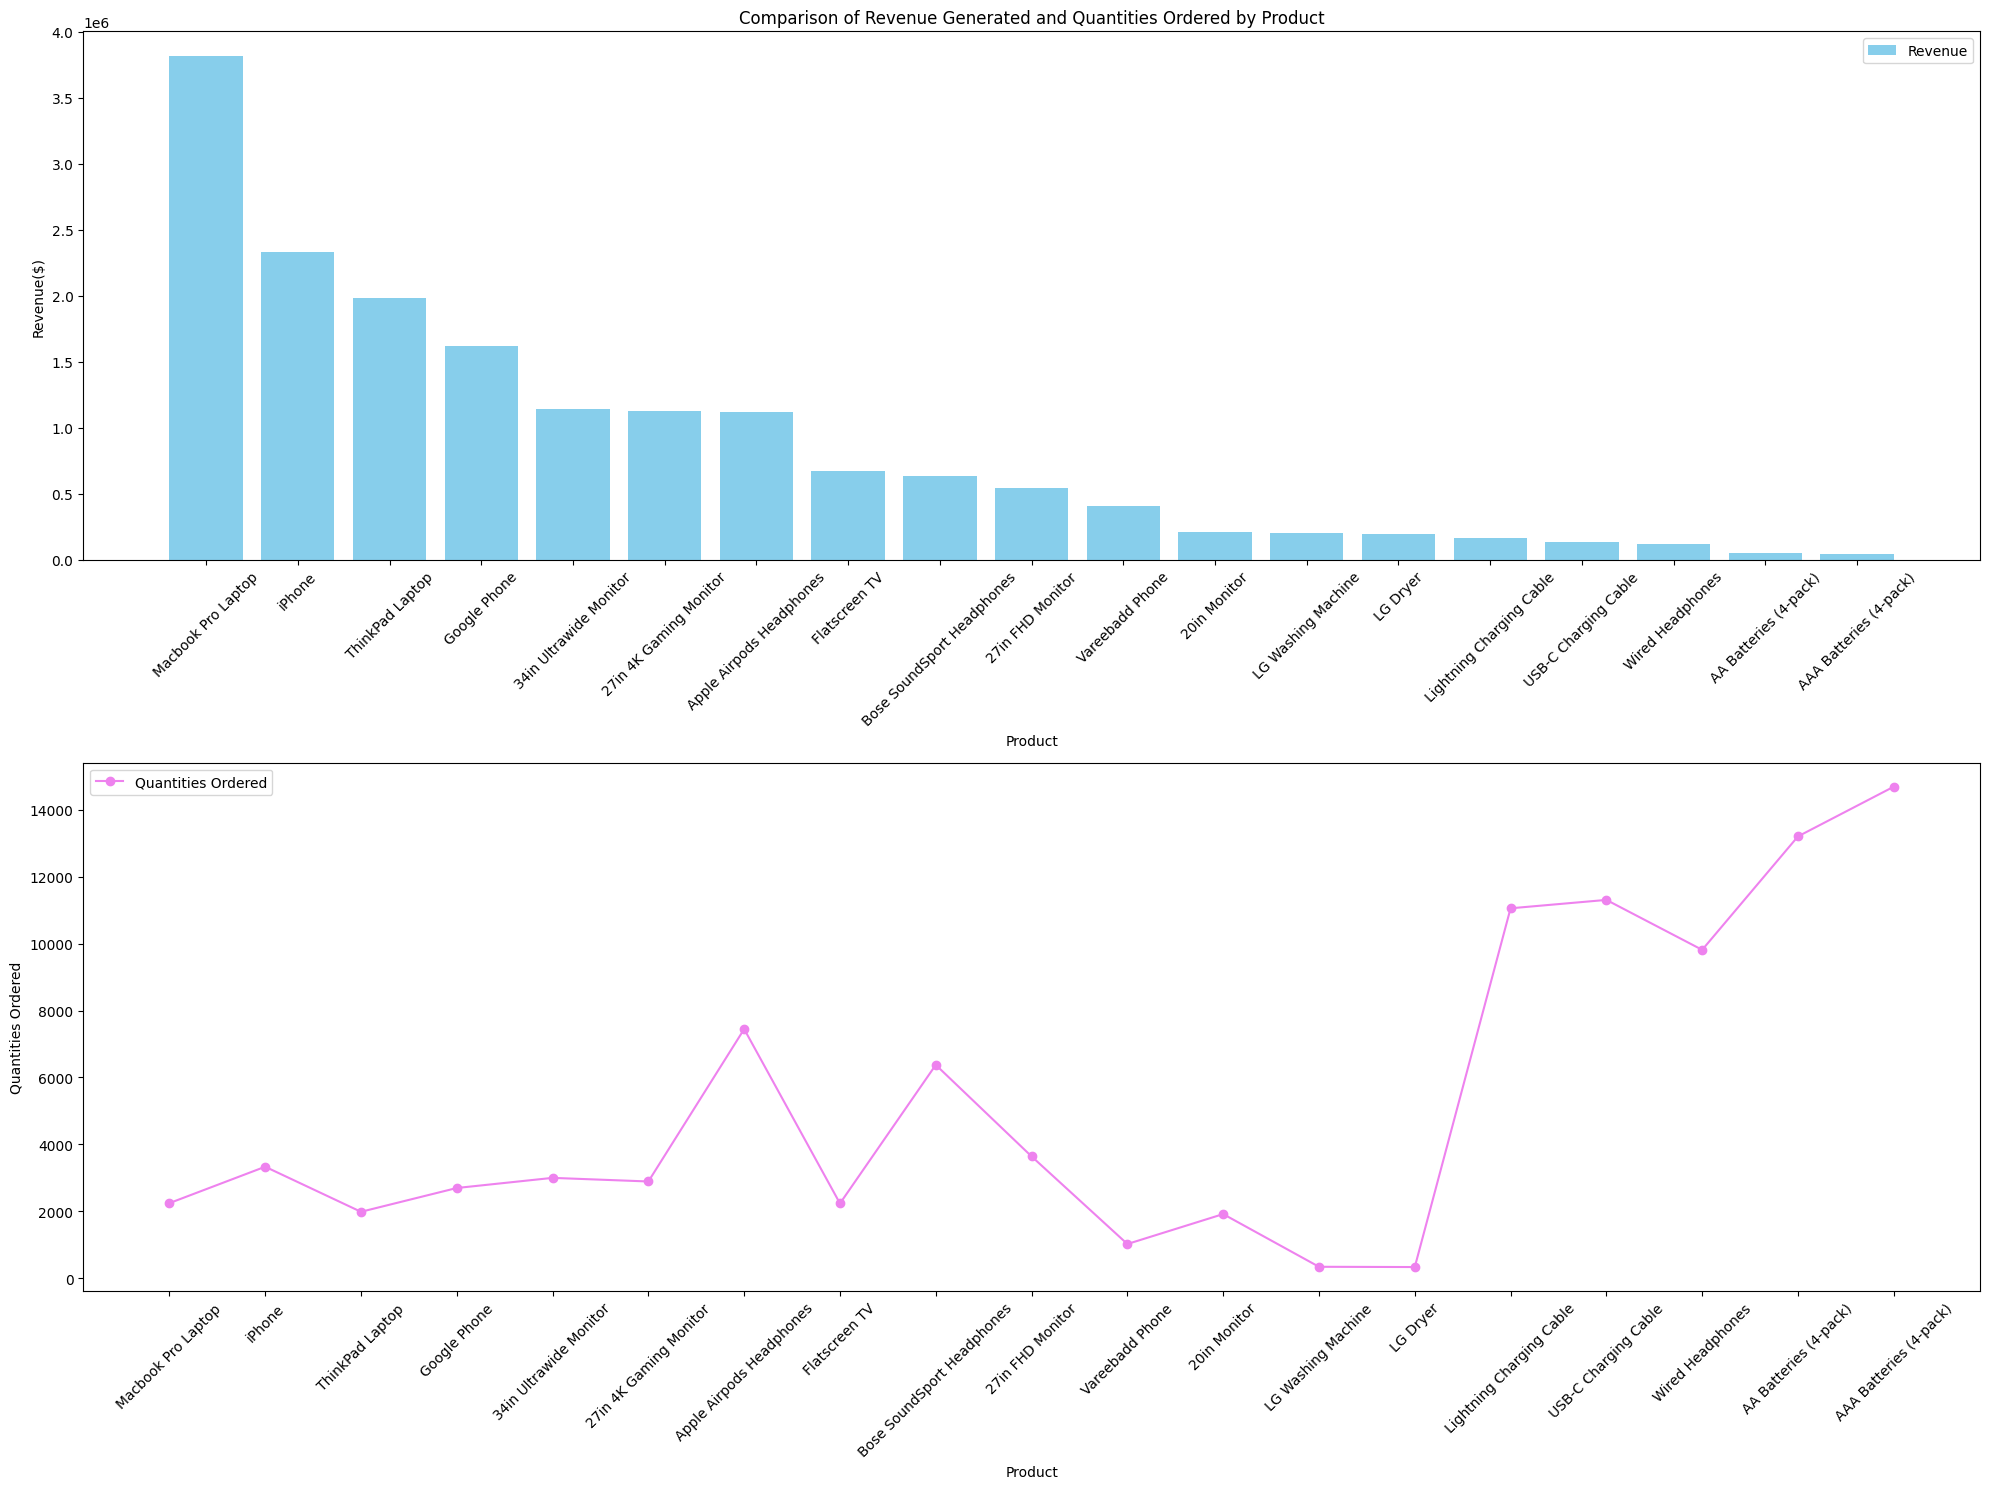

In [168]:
#figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))

# Bar plot for revenue
ax1.bar(product_category['Product'], product_category['Total_amount($)'], label='Revenue', color='skyblue')

# Set labels and title for the first subplot
ax1.set_xlabel('Product')
ax1.set_ylabel('Revenue($)')
ax1.set_title('Comparison of Revenue Generated and Quantities Ordered by Product')
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
ax1.legend()
ax1.grid(False)

# Line plot for quantities ordered
ax2.plot(product_category['Product'], product_category['Quantity_Ordered'], marker='o', color='violet', label='Quantities Ordered')

# Set labels and title for the second subplot
ax2.set_xlabel('Product')
ax2.set_ylabel('Quantities Ordered')
ax2.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
ax2.legend()
ax2.grid(False)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


##### **Answer**
* The top 5 products with the highest order number shows that they are the ones with the least revenue generation and some products with the lowest order number indicates a better revenue generation.

### **7. Between the two levels which is the dominant product level?**
Aggregate the product count by the product level variable and plot pie chart to see the share of each category.

In [169]:

# Grouping by 'Product_level' and counting the occurrences

product_group = df_2019.groupby('Product_level').size().reset_index(name='Count')

product_group

,Product_level,Count
0,basic level product,49450
1,high-level product,39023


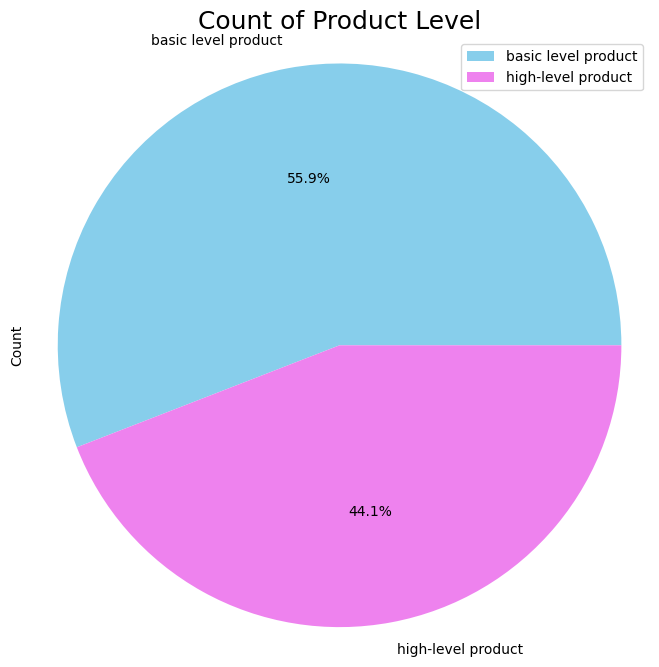

In [170]:
#plot piechart
colors = ['skyblue', 'violet']

# Create the pie chart
ax = product_group.plot(kind='pie', y='Count', labels=product_group['Product_level'], colors=colors, labeldistance=1.1, autopct='%1.1f%%', figsize=(8, 8))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Count of Product Level', fontsize=18)
plt.legend(loc='upper right')  # Show legend
plt.show()

##### **Answer**
* The `basic level products` dominate the `high-level products` with a `55.9%`share of product relative to a `44.1%` share.